In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.random as rand
import scipy.stats as stats

from lifelines.plotting import plot_lifetimes
from lifelines import KaplanMeierFitter
from statsmodels.stats import proportion

plt.rcParams["figure.figsize"] = (40, 20)
plt.rcParams["font.size"] = 32

In [2]:
devices = pd.read_csv("../data/rev-devices.csv")
notifications = pd.read_csv("../data/rev-notifications.csv", parse_dates=['created_date'])
users = pd.read_csv("../data/rev-users.csv")
transactions = pd.read_csv("../data/rev-transactions.csv", parse_dates=['created_date'])

In [15]:
transactions_by_month = transactions.set_index('created_date').groupby(['transactions_state', pd.Grouper(freq="M")]).size().to_frame("transaction_count").unstack(0)
transactions_by_month.columns = transactions_by_month.columns.droplevel()

Drop last row

In [18]:
transactions_by_month.drop(transactions_by_month.tail(1).index,inplace=True)

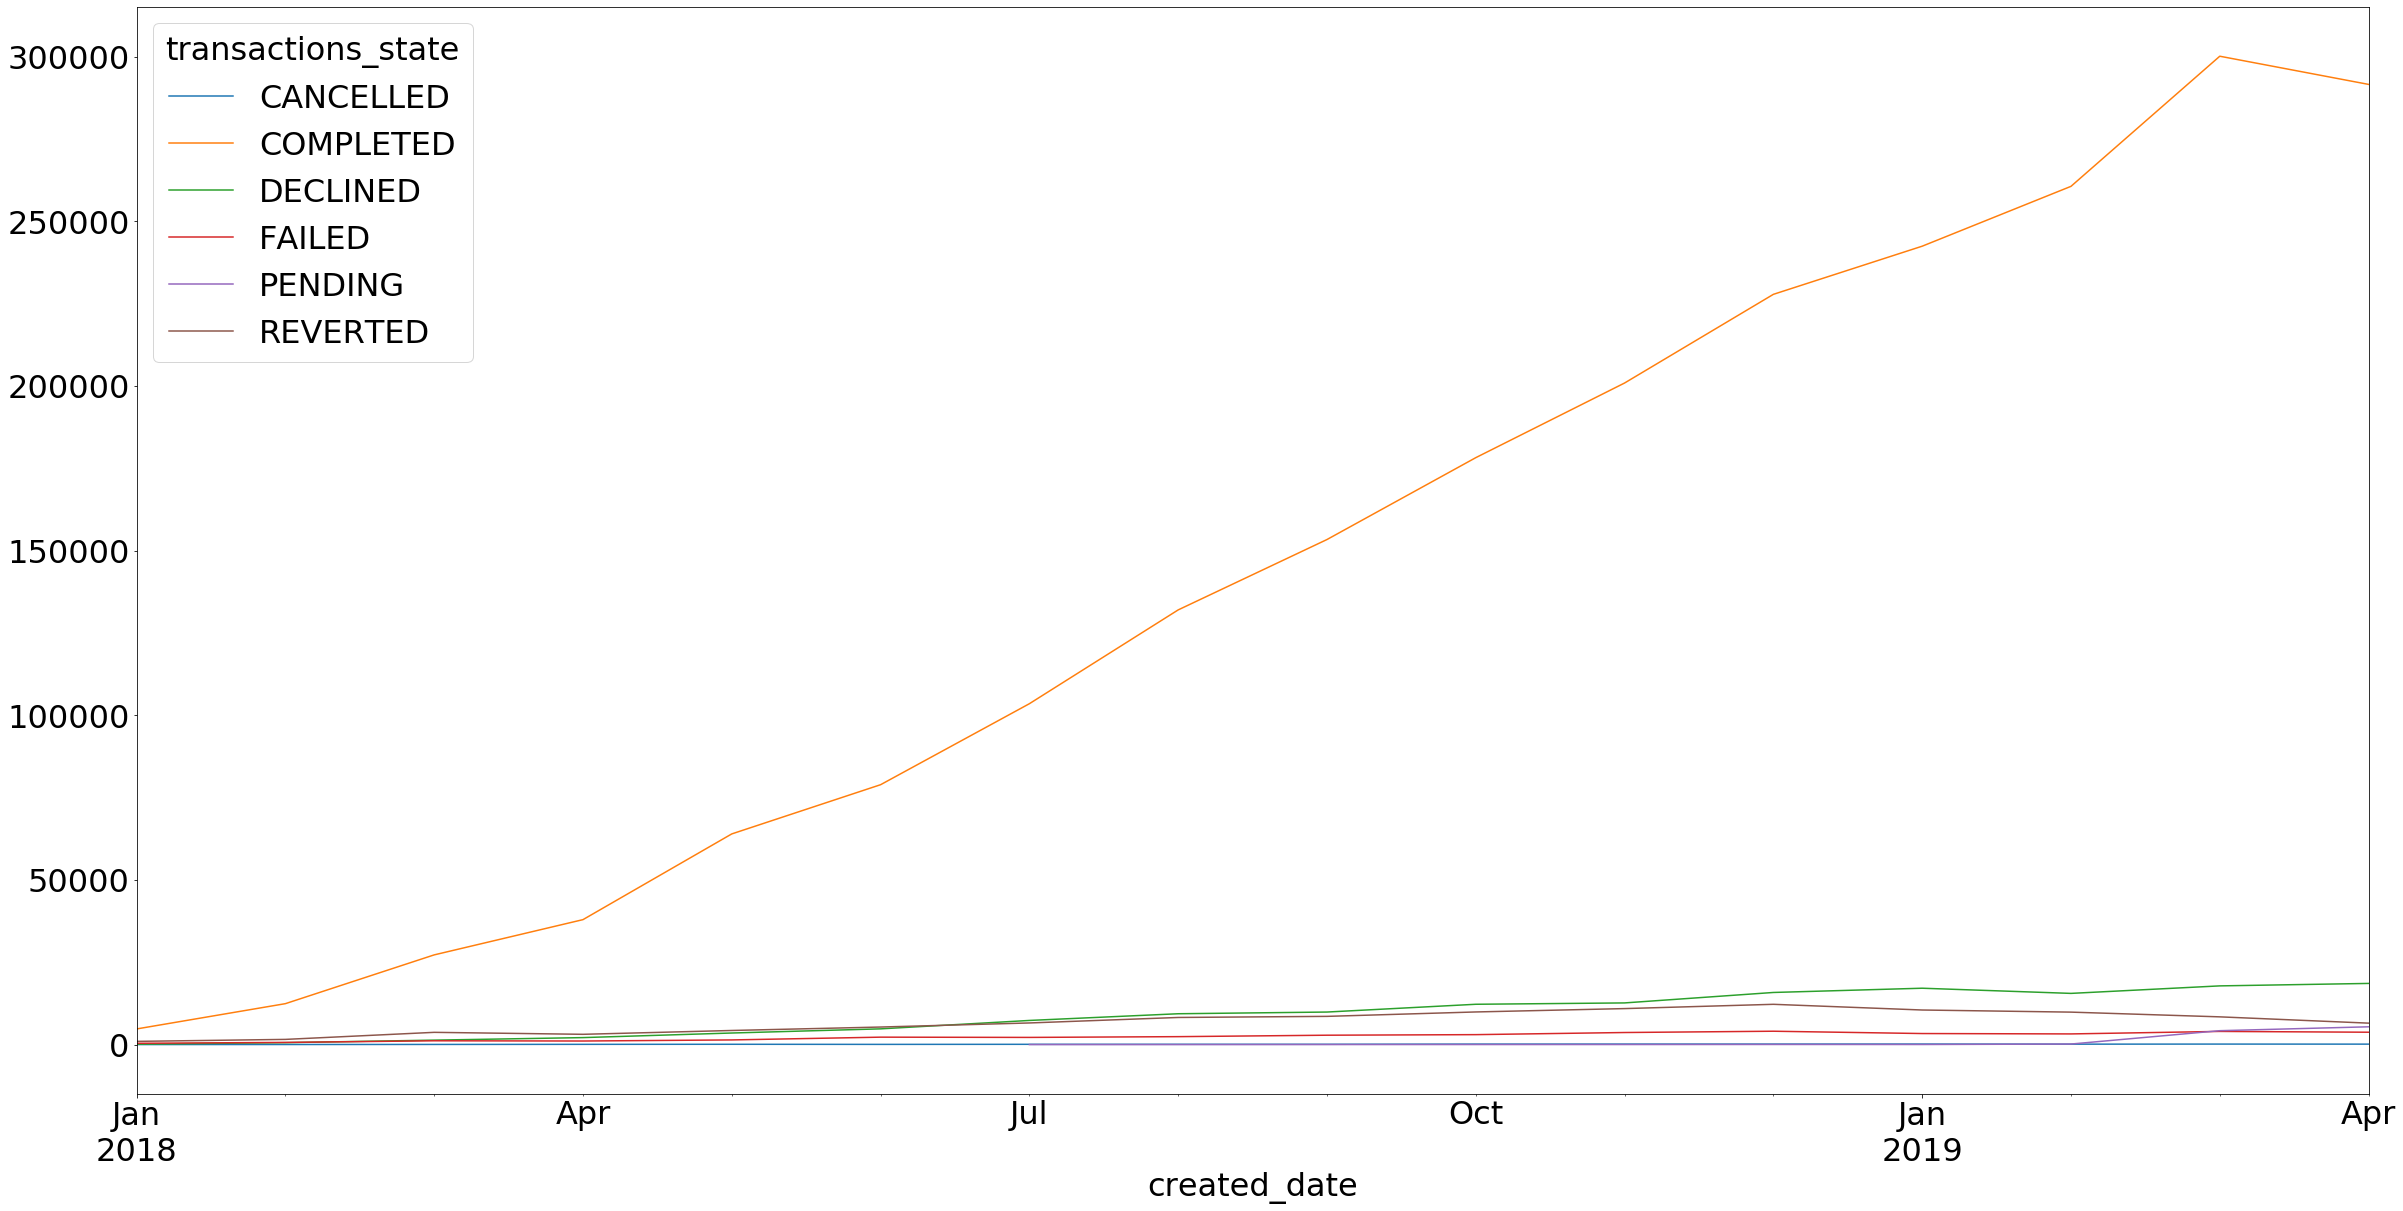

In [23]:
ax=transactions_by_month.plot()
# _=ax.set_title("Transaction counts by state")